# Prediction Using Supervised ML

- [Introduction](#intro)
- [Data Exploration](#eda)
- [Building the Model](#buildmodel)
- [Model Evaluation](#evalmodel)
- [Making Predictions on Unseen Data](#predict)

<a id='intro'></a>
### Introduction </br><br>
In this project, we will explore a dataset that tracks students' studying hours and their respective scores. We will use this data to build a regression model that predicts students scores based on how much time they spent studying. Finally, we will use the model we built to know what would be the predicted score if a student studied for 9.5 hours. <br><br>

To get started let's import our libraries!

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

<a id='eda'></a>
### Data Exploration

Now, let's load our data file and take a look at the first few rows of the data.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's have a look at some summary statistics and check if we have any missing or duplicate data

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.duplicated().sum()

0

>We have a quite small sample of 25 observations. There is no missing data in either column, and no duplicates either.

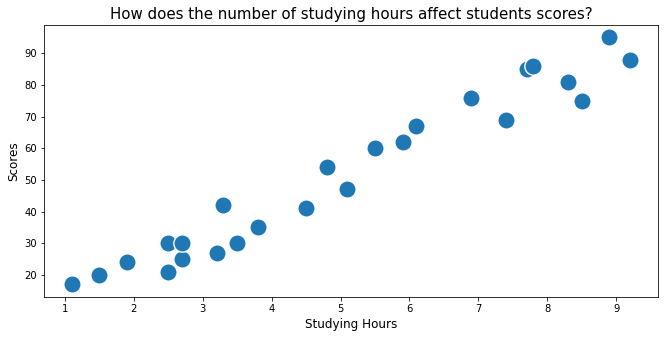

In [15]:
plt.figure(figsize = (11,5))
sns.scatterplot(x = 'Hours', y = 'Scores', data = df, s = 300)
plt.title('How does the number of studying hours affect students scores?', fontsize=15)
plt.xlabel('Studying Hours', fontsize=12)
plt.ylabel('Scores', fontsize=12);

>As expected, we can see a positive linear relationship between Studying Hours and Scores, which means that as students spend more hours studying, they should expect to get higher scores on average.

<a id='buildmodel'></a>
### Building the Model

In [8]:
# prepare the data

X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values

In [9]:
# split the data and train the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<a id='evalmodel'></a>
### Model Evaluation

In [10]:
r_2 = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
print('Goodness of fit = {}\nMean Absolute Error = {}'.format(r_2, mae))

Goodness of fit = 0.9454906892105356
Mean Absolute Error = 4.183859899002975


> ~95% of variation in scores could be explained by variation in studying hours <br>
> On average, our predicted score is 4.18 points away from the actual score

<a id='predict'></a>
### Making Predictions on Unseen Data

In [11]:
pd.DataFrame({'Studying Hours': X_test.reshape(-1),'Actual Scores': y_test, 'Predicted Scores': y_pred})

,Studying Hours,Actual Scores,Predicted Scores
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


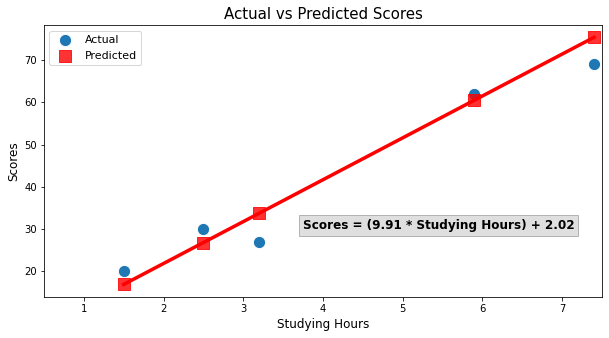

In [12]:
fig = plt.figure(figsize = (10,5))
sns.scatterplot(x = X_test[:, 0], y = y_test, ci = None, label = 'Actual', s = 150)
sns.regplot(x = X_test[:, 0], y = y_pred, ci = None, color = 'red', marker = 's', label = 'Predicted',
            scatter_kws = {'s' : 150}, line_kws = {'lw' : 3.5})
text = 'Scores = ({} * Studying Hours) + {}'.format(round(model.coef_[0],2), round(model.intercept_,2))
plt.text(3.75, 30, text, fontsize = 12, fontweight = 'bold', bbox=dict(boxstyle="square",facecolor='gray',alpha=.25))
plt.xlim([0.5, 7.5])
plt.title('Actual vs Predicted Scores', fontsize = 15)
plt.xlabel('Studying Hours', fontsize = 12)
plt.ylabel('Scores', fontsize = 12)
plt.legend(fontsize = 11);

#### What would be the predicted score if a student studied for 9.5 hours?

In [13]:
print(f'Predicted Score is: {round(model.predict([[9.5]])[0], 2)}')

Predicted Score is: 96.17
